In [172]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
@dataclass
class data:
    header: np.int8
    micros: np.uint32
    a_x: np.int16
    a_y: np.int16
    a_z: np.int16
    newline: np.int8

In [173]:
with open("data0.txt", mode='rb') as file: # b is important -> binary
    fileContent = file.read()
    data_np = np.frombuffer(fileContent,np.uint8)

In [174]:
data_2d = data_np.reshape((-1, 12))[1:]
micros = np.zeros(data_2d.shape[0],dtype=np.uint32)
acceleration = np.zeros((data_2d.shape[0],3),dtype=np.int16)
for i in range(data_2d.shape[0]):
    micros[i] = (data_2d[i,1] << 24) + (data_2d[i,2] << 16) + (data_2d[i,3] << 8) + (data_2d[i,4] << 0)
    acceleration[i] = np.array([(data_2d[i,5] << 8) + (data_2d[i,6] << 0),(data_2d[i,7] << 8) + (data_2d[i,8] << 0),(data_2d[i,9] << 8) + (data_2d[i,10] << 0)],dtype=np.int16)

In [175]:
(data_2d[1,9] << 8) + data_2d[1,10]

0

In [176]:
index = 27000
np.uint32((data_2d[index,1] << 24) + (data_2d[index,2] << 16) + (data_2d[index,3] << 8) + (data_2d[index,4] << 0))

8804094

In [177]:
micros

array([   738462,    738705,    738948, ..., 230343043, 230343283,
       230343524], dtype=uint32)

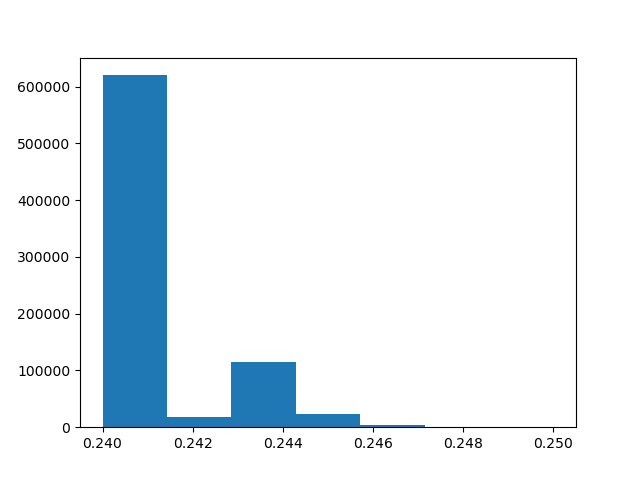

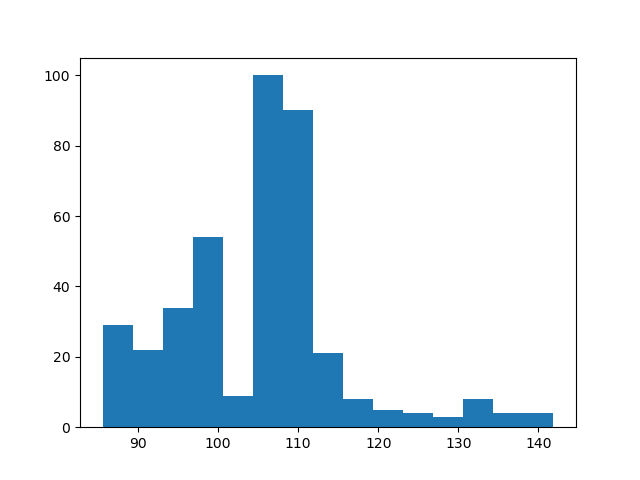

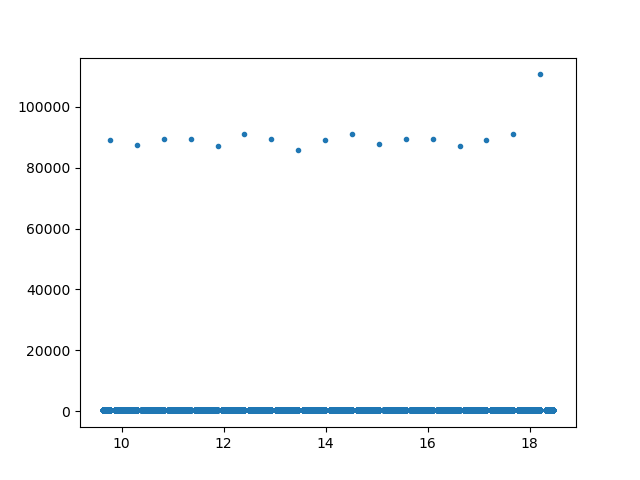

In [179]:
import matplotlib.pyplot as plt
micros_diff = np.diff(micros)[:-1]

plt.figure()
plt.hist(micros_diff[micros_diff<20000]*1e-3,7)
plt.figure()
plt.hist(micros_diff[micros_diff>20000]*1e-3,15)
plt.figure()
plt.plot(micros[30000:60000]*1e-6,micros_diff[30000:60000],'.')

In [189]:
acceleration[300000:600000]

array([[  220,   -84, 15512],
       [  220,   -84, 15512],
       [  220,   -84, 15512],
       ...,
       [   48,   -72, 15576],
       [  188,    28, 15588],
       [  188,    28, 15588]], dtype=int16)

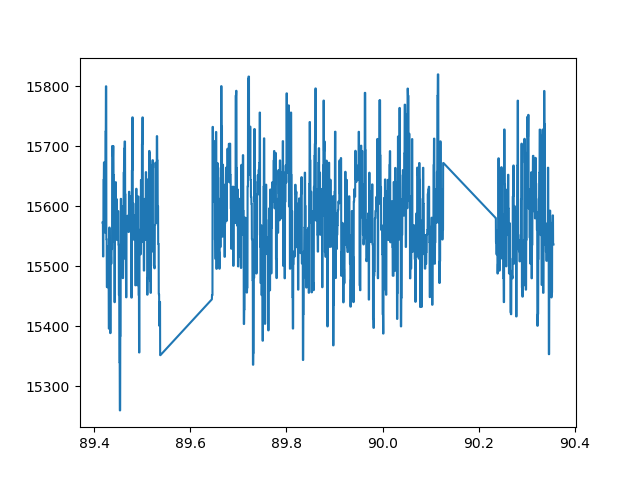

In [196]:
plt.figure()
plt.plot(micros[301500:304500]*1e-6,np.linalg.norm(acceleration[301500:304500],axis=1))